In [82]:
# Impoting required libraries
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
milk = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\milk.csv",
                  index_col = 0)

In [84]:
scaler = StandardScaler()

In [85]:
milk_scaled = scaler.fit_transform(milk)

# Finding the best cluster based on WSS

In [86]:
wss = []
for i in range(2,10):
    km = KMeans(n_clusters=i,
               random_state = 2022)
    km.fit(milk_scaled)
    labels = km.predict(milk_scaled)
    wss.append(km.inertia_)

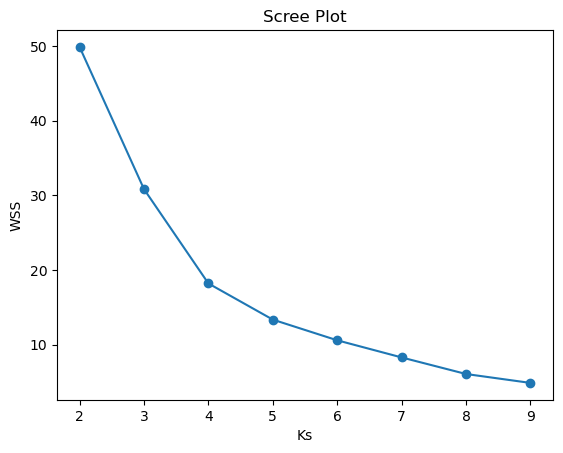

In [87]:
plt.scatter(np.arange(2,10), wss)
plt.plot(np.arange(2,10), wss)
plt.title("Scree Plot")
plt.xlabel("Ks")
plt.ylabel("WSS")
plt.show()

## Best Cluster

In [89]:
km = KMeans(n_clusters=4,
           random_state=2022)
km.fit(milk_scaled)
labels = km.predict(milk_scaled)

In [90]:
milk["Cluster"] = labels
milk.sort_values("Cluster", inplace=True)
milk

,water,protein,fat,lactose,ash,Cluster
Animal,,,,,,
ELEPHANT,70.7,3.6,17.6,5.6,0.63,0
DOG,76.3,9.3,9.5,3.0,1.20,0
SHEEP,82.0,5.6,6.4,4.7,0.91,0
PIG,82.8,7.1,5.1,3.7,1.10,0
BUFFALO,82.1,5.9,7.9,4.7,0.78,0
GUINEA PIG,81.9,7.4,7.2,2.7,0.85,0
CAT,81.6,10.1,6.3,4.4,0.75,0
FOX,81.6,6.6,5.9,4.9,0.93,0
HORSE,90.1,2.6,1.0,6.9,0.35,1


# Calculating centroids

In [92]:
milk.groupby("Cluster").mean()

,water,protein,fat,lactose,ash
Cluster,,,,,
0,79.875,6.95,8.2375,4.2125,0.89375
1,88.500,2.57,2.8000,5.6800,0.48500
2,67.860,10.74,17.3800,2.3800,1.64000
3,45.650,10.15,38.4500,0.4500,0.69000


# Calculating cluster by Silhouette

In [93]:
sil = []
for i in range(2,10):
    km = KMeans(n_clusters=i,
               random_state = 2022)
    km.fit(milk_scaled)
    labels = km.predict(milk_scaled)
    sil.append(silhouette_score(milk_scaled,labels))

In [96]:
sil

[0.525850893170342,
 0.5391595072079529,
 0.4460726841604366,
 0.40926029392635116,
 0.3864620109087791,
 0.3720658628104659,
 0.3972092980630063,
 0.40670703353631993]

In [101]:
Ks = np.arange(2,10)
i_max = np.argmax(sil)
print(i_max)
best_k = Ks[i_max]

print("Best k: ", best_k)
# for loop from 2 so refer above working
print(sil[i_max])

1
Best k:  3
0.5391595072079529


In [102]:
km = KMeans(n_clusters=4,
           random_state=2022)
km.fit(milk_scaled)
labels = km.predict(milk_scaled)

In [103]:
milk["Cluster"] = labels
milk.sort_values("Cluster", inplace=True)
milk

,water,protein,fat,lactose,ash,Cluster
Animal,,,,,,
CAMEL,87.7,3.5,3.4,4.8,0.71,0
DOG,76.3,9.3,9.5,3.0,1.20,0
SHEEP,82.0,5.6,6.4,4.7,0.91,0
BUFFALO,82.1,5.9,7.9,4.7,0.78,0
DOLPHIN,44.9,10.6,34.9,0.9,0.53,0
SEAL,46.4,9.7,42.0,0.0,0.85,0
HIPPO,90.4,0.6,4.5,4.4,0.10,0
HORSE,90.1,2.6,1.0,6.9,0.35,0
DONKEY,90.3,1.7,1.4,6.2,0.40,1
